In [1]:
import os, shutil

original_dataset_dir_cats = r'C:\Users\PC\Desktop\sxoli\deep learning\cats_dogs\Cat'
original_dataset_dir_dogs = r'C:\Users\PC\Desktop\sxoli\deep learning\cats_dogs\Dog'

base_dir = r'C:\Users\PC\Desktop\sxoli\deep learning\base_cats_dogs'

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)
fnames = ['cat.{}.jpg'.format(i) for i in range(4000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_cats, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(4000, 5000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_cats, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(5000, 6000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_cats, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    fnames = ['dog.{}.jpg'.format(i) for i in range(4000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_dogs, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(4000, 5000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_dogs, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(5000, 6000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_dogs, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [2]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 4000


In [3]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 4000


In [4]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 1000


In [5]:
 print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 1000


In [6]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 1000


In [7]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 1000


In [8]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [10]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [12]:
 for data_batch, labels_batch in train_generator:
     print('data batch shape:', data_batch.shape)
     print('labels batch shape:', labels_batch.shape)
     break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [13]:
history = model.fit(train_generator,steps_per_epoch=100,epochs=50,validation_data=validation_generator,validation_steps=50)

Epoch 1/50
100/100 [==============================] - 32s 313ms/step - loss: 0.6938 - acc: 0.5070 - val_loss: 0.6921 - val_acc: 0.5110
Epoch 2/50
100/100 [==============================] - 27s 267ms/step - loss: 0.6748 - acc: 0.5745 - val_loss: 0.6560 - val_acc: 0.6360
Epoch 3/50
100/100 [==============================] - 25s 252ms/step - loss: 0.6445 - acc: 0.6385 - val_loss: 0.6239 - val_acc: 0.6630
Epoch 4/50
100/100 [==============================] - 24s 242ms/step - loss: 0.6240 - acc: 0.6670 - val_loss: 0.6001 - val_acc: 0.6690
Epoch 5/50
100/100 [==============================] - 24s 238ms/step - loss: 0.6000 - acc: 0.6925 - val_loss: 0.6068 - val_acc: 0.6650
Epoch 6/50
100/100 [==============================] - 24s 237ms/step - loss: 0.5950 - acc: 0.6695 - val_loss: 0.5934 - val_acc: 0.6800
Epoch 7/50
100/100 [==============================] - 24s 237ms/step - loss: 0.5784 - acc: 0.6880 - val_loss: 0.5612 - val_acc: 0.7290
Epoch 8/50
100/100 [==============================] - 2

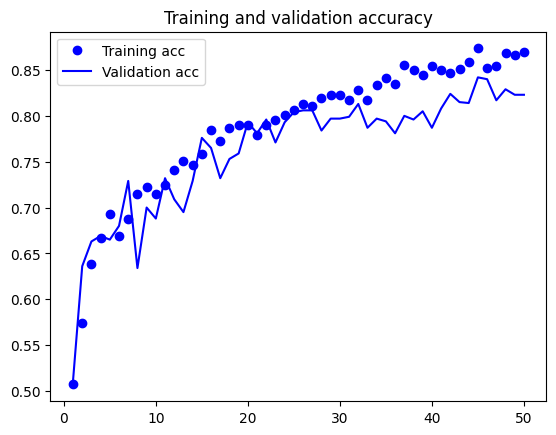

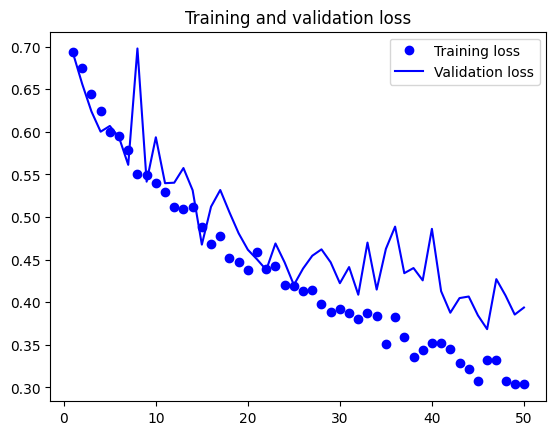

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()